In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('PharmaSales.xlsx')

In [3]:
#inference
#compare date of max sales with month of covid cases 1: dataset

C:\Users\chera\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


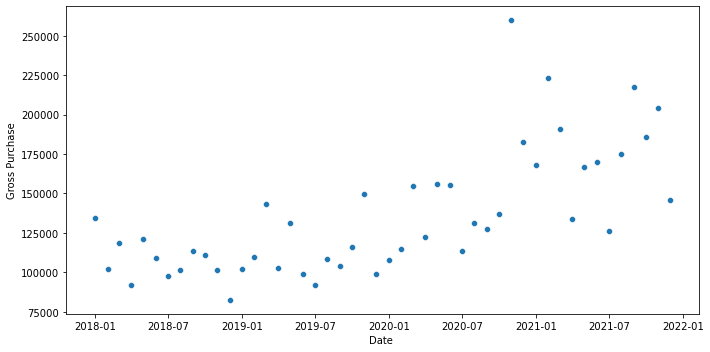

In [4]:
plt.figure(figsize=[10,5])
sns.scatterplot(df['Date\xa0'],df['Gross\xa0Purchase'])
plt.tight_layout()

C:\Users\chera\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


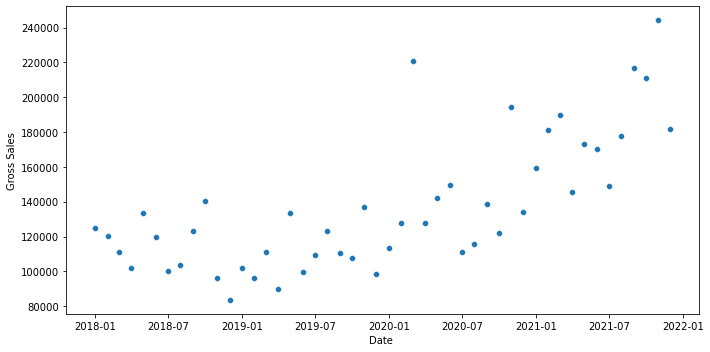

In [5]:
plt.figure(figsize=[10,5])
sns.scatterplot(df['Date\xa0'],df['Gross\xa0Sales'])
plt.tight_layout()

since this data set has no target variable we will be doing a unsupervised Algorithm on the data set .we will try to label the data into different clusters and then compare it with the total number of covid cases.

In [6]:
from sklearn.metrics import silhouette_score 
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

In [7]:
#removing date feature for now 
X=df.drop('Date\xa0',axis=1)

In [8]:
#scaling the data
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=pd.DataFrame(ss.fit_transform(X),columns=X.columns)

In [9]:
#finding a optimal cluslter for the data
for cls in [2,3,4,5,6,7,8,9]:
    km = KMeans(n_clusters=cls,random_state=10)
    km.fit(X)
    x_pred = km.predict(X)
    print(cls,silhouette_score(X,x_pred))

2 0.46889208673152777
3 0.5072224931614634
4 0.4703663877367394
5 0.29817854556483514
6 0.329594540213147
7 0.34055603373044113
8 0.3438086743588611
9 0.3406530112130219


In [10]:
#as we see the number of clusters are 3 building a model with 3 clusters
kmeans = KMeans(n_clusters=3,random_state=10)
kmeans.fit(X)
df['lables']=kmeans.predict(X)

In [11]:
df[df['lables']==0].describe()

,Gross Purchase,Gross Sales,Net Purchase / Sales,Gross Purchase.1,Gross Sales.1,Net Purchase / Sales.1,lables
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0
mean,221779.520000,169917.676667,51861.843333,86897.676667,120887.943333,-33990.266667,0.0
std,38640.669653,31569.341847,12055.291275,16305.986137,1015.608843,16234.566837,0.0
min,182528.470000,134304.530000,42044.460000,71778.070000,120097.240000,-48319.170000,0.0
25%,202779.570000,157645.370000,45134.200000,78258.935000,120315.250000,-42806.350000,0.0
50%,223030.670000,180986.210000,48223.940000,84739.800000,120533.260000,-37293.530000,0.0
75%,241405.045000,187724.250000,56770.535000,94457.480000,121283.295000,-26825.815000,0.0
max,259779.420000,194462.290000,65317.130000,104175.160000,122033.330000,-16358.100000,0.0


In [12]:
df[df['lables']==1].describe()

,Gross Purchase,Gross Sales,Net Purchase / Sales,Gross Purchase.1,Gross Sales.1,Net Purchase / Sales.1,lables
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.0
mean,115928.180000,116747.270000,-819.090000,80753.116471,76116.846765,4636.269706,1.0
std,18576.368723,16957.251316,12528.027685,11038.860312,10911.102195,10214.834885,0.0
min,82545.460000,83648.830000,-29201.200000,58637.910000,54994.600000,-17318.440000,1.0
25%,101821.310000,102112.527500,-10092.017500,74661.655000,68440.022500,-60.175000,1.0
50%,112269.615000,114428.575000,-1619.610000,80169.880000,73715.480000,3233.015000,1.0
75%,130376.482500,127662.520000,8422.957500,88913.287500,85943.090000,12441.405000,1.0
max,155977.410000,149722.850000,32371.430000,100992.390000,99381.710000,26033.900000,1.0


In [13]:
df[df['lables']==2].describe()

,Gross Purchase,Gross Sales,Net Purchase / Sales,Gross Purchase.1,Gross Sales.1,Net Purchase / Sales.1,lables
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0
mean,173237.940909,190278.644545,-17040.703636,128560.163636,114429.293636,14130.870000,2.0
std,26041.343578,29244.371862,23037.464668,18271.920006,15783.624326,18625.660173,0.0
min,125896.680000,149090.070000,-65816.700000,105544.290000,99516.180000,-11970.540000,2.0
25%,160940.625000,171603.460000,-30532.890000,114017.740000,104161.845000,4837.705000,2.0
50%,170188.950000,181567.490000,-6015.340000,131185.180000,107246.160000,6894.690000,2.0
75%,188163.170000,213930.830000,443.940000,140112.505000,121004.260000,24477.095000,2.0
max,217636.410000,244105.960000,8980.810000,157856.930000,147136.750000,55595.180000,2.0


In [14]:
#since most of the data in from the 1st label we are analysing it
z=df[df['lables']==1]

C:\Users\chera\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date\xa0', ylabel='Gross\xa0Sales'>

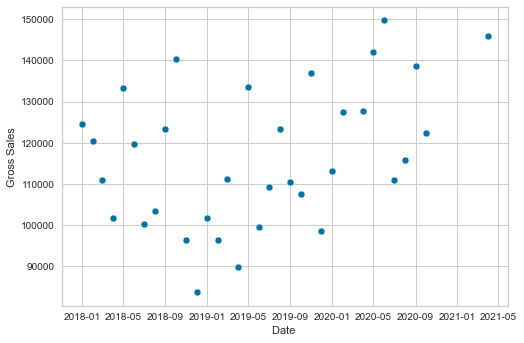

In [15]:
sns.scatterplot(z['Date\xa0'],z['Gross\xa0Sales'])

C:\Users\chera\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date\xa0', ylabel='Gross\xa0Sales'>

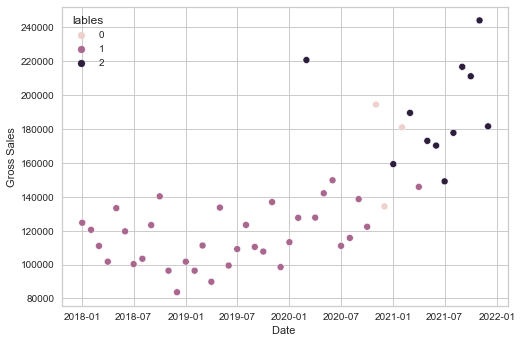

In [16]:
#infrence***(1)
sns.scatterplot(df['Date\xa0'],df['Gross\xa0Sales'],hue=df['lables'])